In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%pip install pyheif Pillow
%pip install python-magic
%pip install opencv-python


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('./'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 52.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Frame the problem
Using the customer description, define the problem you're trying to solve in your own words (remember this is not technical but must be specific so the customer understands the project).

The goal of the project is to make model that identifies a cursive letter succesfully over 75 percent of the time. The letter can be in upper case or lower case 

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

Data is given by the client. Below is the code to make it accessable:

In [2]:
# Function to convert heic file to jpg
import os
import pyheif
from PIL import Image

def convert_heic_to_jpg(heic_file, output_folder):
    # Load HEIC file
    heif_file = pyheif.read(heic_file)

    # Create a PIL Image from the HEIC file
    image = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
        heif_file.mode,
        heif_file.stride,
    )

    # Prepare the output file path
    base_name = os.path.splitext(os.path.basename(heic_file))[0]
    jpg_file = os.path.join(output_folder, f"{base_name}.jpg")

    # Save as JPG
    image.save(jpg_file, "JPEG")
    print(f"Converted {heic_file} to {jpg_file}")

def convert_directory(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.lower().endswith('.heic'):
            heic_path = os.path.join(input_folder, filename)
            convert_heic_to_jpg(heic_path, output_folder)

# input_folder = 'data/S1'
# output_folder = 'data/S1jpg'
# convert_directory(input_folder, output_folder)


In [3]:
# input_folder2 = 'data/S2'
# output_folder2 = 'data/S2jpg'
# convert_directory(input_folder2, output_folder2)

In [4]:
# input_folder3 = 'data/S3'
# output_folder3 = 'data/S3jpg'
# convert_directory(input_folder3, output_folder3)

In [5]:
# input_folder5 = 'data/S5'
# output_folder5 = 'data/S5jpg'
# convert_directory(input_folder5, output_folder5)

In [6]:
# input_folder6 = 'data/S6'
# output_folder6 = 'data/S6jpg'
# convert_directory(input_folder6, output_folder6)

In [7]:
import magic

def check_file_type(file_path):
    try:
        # Create a magic instance
        mime = magic.Magic(mime=True)
        # Get the MIME type
        file_type = mime.from_file(file_path)
        return file_type
    except Exception as e:
        return str(e)

file_path = 'data/S8/A'  # Replace with your file path
file_type = check_file_type(file_path)
print(f"The file type is: {file_type}")


The file type is: image/heic


The data in s8 is also of file type heic but new code will have to be written to convert it.

In [8]:
# input_folder9 = 'data/S9'
# output_folder9 = 'data/S9jpg'
# convert_directory(input_folder9, output_folder9)

In [9]:
# Example usage
file_path2 = 'data/S12/a'  # Replace with your file path
file_type2 = check_file_type(file_path2)
print(f"The file type is: {file_type2}")

The file type is: image/heic


In [10]:
# input_folder13 = 'data/S13'
# output_folder13 = 'data/S13jpg'
# convert_directory(input_folder13, output_folder13)

In [11]:
# input_folder14 = 'data/S14'
# output_folder14 = 'data/S14jpg'
# convert_directory(input_folder14, output_folder14)

now time to deal with 8 and 12!

In [15]:
# # Specify the folder path
# folder_path = 'data/S8'

# # Loop through all files in the specified folder
# for filename in os.listdir(folder_path):
#     # Create the full file path
#     old_file_path = os.path.join(folder_path, filename)
    
#     # Check if it's a file (not a directory)
#     if os.path.isfile(old_file_path):
#         # Add the .heic extension
#         new_file_path = old_file_path + '.heic'
        
#         # Rename the file
#         os.rename(old_file_path, new_file_path)
#         print(f'Renamed: {old_file_path} to {new_file_path}')


Renamed: data/S8/D to data/S8/D.heic
Renamed: data/S8/S to data/S8/S.heic
Renamed: data/S8/Y to data/S8/Y.heic
Renamed: data/S8/F to data/S8/F.heic
Renamed: data/S8/J to data/S8/J.heic
Renamed: data/S8/T to data/S8/T.heic
Renamed: data/S8/B to data/S8/B.heic
Renamed: data/S8/U to data/S8/U.heic
Renamed: data/S8/X to data/S8/X.heic
Renamed: data/S8/E to data/S8/E.heic
Renamed: data/S8/C to data/S8/C.heic
Renamed: data/S8/L to data/S8/L.heic
Renamed: data/S8/Z to data/S8/Z.heic
Renamed: data/S8/Q to data/S8/Q.heic
Renamed: data/S8/G to data/S8/G.heic
Renamed: data/S8/M to data/S8/M.heic
Renamed: data/S8/V to data/S8/V.heic
Renamed: data/S8/K to data/S8/K.heic
Renamed: data/S8/I to data/S8/I.heic
Renamed: data/S8/O to data/S8/O.heic
Renamed: data/S8/N to data/S8/N.heic
Renamed: data/S8/R to data/S8/R.heic
Renamed: data/S8/H to data/S8/H.heic
Renamed: data/S8/W to data/S8/W.heic
Renamed: data/S8/A to data/S8/A.heic
Renamed: data/S8/P to data/S8/P.heic


In [16]:
# # Specify the folder path
# folder_path2 = 'data/S12'

# # Loop through all files in the specified folder
# for filename2 in os.listdir(folder_path2):
#     # Create the full file path
#     old_file_path2  = os.path.join(folder_path2, filename2)
    
#     # Check if it's a file (not a directory)
#     if os.path.isfile(old_file_path2):
#         # Add the .heic extension
#         new_file_path2 = old_file_path2 + '.heic'
        
#         # Rename the file
#         os.rename(old_file_path2, new_file_path2)
#         print(f'Renamed: {old_file_path2} to {new_file_path2}')


Renamed: data/S12/q to data/S12/q.heic
Renamed: data/S12/k to data/S12/k.heic
Renamed: data/S12/r to data/S12/r.heic
Renamed: data/S12/c to data/S12/c.heic
Renamed: data/S12/d to data/S12/d.heic
Renamed: data/S12/p to data/S12/p.heic
Renamed: data/S12/e to data/S12/e.heic
Renamed: data/S12/w to data/S12/w.heic
Renamed: data/S12/m to data/S12/m.heic
Renamed: data/S12/n to data/S12/n.heic
Renamed: data/S12/o to data/S12/o.heic
Renamed: data/S12/s to data/S12/s.heic
Renamed: data/S12/b to data/S12/b.heic
Renamed: data/S12/y to data/S12/y.heic
Renamed: data/S12/f to data/S12/f.heic
Renamed: data/S12/i to data/S12/i.heic
Renamed: data/S12/a to data/S12/a.heic
Renamed: data/S12/g to data/S12/g.heic
Renamed: data/S12/u to data/S12/u.heic
Renamed: data/S12/z to data/S12/z.heic
Renamed: data/S12/t to data/S12/t.heic
Renamed: data/S12/v to data/S12/v.heic
Renamed: data/S12/x to data/S12/x.heic
Renamed: data/S12/l to data/S12/l.heic
Renamed: data/S12/j to data/S12/j.heic
Renamed: data/S12/h to da

In [18]:
# input_folder8 = 'data/S8'
# output_folder8 = 'data/S8jpg'
# convert_directory(input_folder8, output_folder8)

Converted data/S8/X.heic to data/S8jpg/X.jpg
Converted data/S8/C.heic to data/S8jpg/C.jpg
Converted data/S8/V.heic to data/S8jpg/V.jpg
Converted data/S8/T.heic to data/S8jpg/T.jpg
Converted data/S8/Q.heic to data/S8jpg/Q.jpg
Converted data/S8/G.heic to data/S8jpg/G.jpg
Converted data/S8/I.heic to data/S8jpg/I.jpg
Converted data/S8/O.heic to data/S8jpg/O.jpg
Converted data/S8/U.heic to data/S8jpg/U.jpg
Converted data/S8/B.heic to data/S8jpg/B.jpg
Converted data/S8/F.heic to data/S8jpg/F.jpg
Converted data/S8/D.heic to data/S8jpg/D.jpg
Converted data/S8/P.heic to data/S8jpg/P.jpg
Converted data/S8/A.heic to data/S8jpg/A.jpg
Converted data/S8/R.heic to data/S8jpg/R.jpg
Converted data/S8/J.heic to data/S8jpg/J.jpg
Converted data/S8/E.heic to data/S8jpg/E.jpg
Converted data/S8/N.heic to data/S8jpg/N.jpg
Converted data/S8/Y.heic to data/S8jpg/Y.jpg
Converted data/S8/S.heic to data/S8jpg/S.jpg
Converted data/S8/Z.heic to data/S8jpg/Z.jpg
Converted data/S8/L.heic to data/S8jpg/L.jpg
Converted 

In [19]:
# input_folder12 = 'data/S12'
# output_folder12 = 'data/S12jpg'
# convert_directory(input_folder12, output_folder12)

Converted data/S12/v.heic to data/S12jpg/v.jpg
Converted data/S12/p.heic to data/S12jpg/p.jpg
Converted data/S12/y.heic to data/S12jpg/y.jpg
Converted data/S12/h.heic to data/S12jpg/h.jpg
Converted data/S12/j.heic to data/S12jpg/j.jpg
Converted data/S12/g.heic to data/S12jpg/g.jpg
Converted data/S12/c.heic to data/S12jpg/c.jpg
Converted data/S12/e.heic to data/S12jpg/e.jpg
Converted data/S12/l.heic to data/S12jpg/l.jpg
Converted data/S12/d.heic to data/S12jpg/d.jpg
Converted data/S12/n.heic to data/S12jpg/n.jpg
Converted data/S12/i.heic to data/S12jpg/i.jpg
Converted data/S12/z.heic to data/S12jpg/z.jpg
Converted data/S12/s.heic to data/S12jpg/s.jpg
Converted data/S12/r.heic to data/S12jpg/r.jpg
Converted data/S12/b.heic to data/S12jpg/b.jpg
Converted data/S12/f.heic to data/S12jpg/f.jpg
Converted data/S12/a.heic to data/S12jpg/a.jpg
Converted data/S12/x.heic to data/S12jpg/x.jpg
Converted data/S12/u.heic to data/S12jpg/u.jpg
Converted data/S12/w.heic to data/S12jpg/w.jpg
Converted dat

Done converting!

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

The first thing I noticed when looking at the data was that a lot of it is not labelled, so that will have to be done in the next stage. Additionally, some are capital and some are lower case so that will also have to be dealt with. Here are the layouts:
S1 - S5 are all uppercase cursive letters and unlabled
S6 - S14 are lowercase and labelled

In [22]:
from PIL import Image
import os

def get_image_sizes_in_folder(folder_path):
    """Prints the size of each image in the specified folder."""
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Check if it's a file and has a common image extension
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.heic')):
            size = get_image_size(file_path)
            if size:
                print(f"{filename}: {size[0]}x{size[1]} pixels")
            else:
                print(f"Could not determine size for {filename}.")

def get_image_size(image_path):
    """Returns the size of the image as (width, height) or None if the image can't be opened."""
    try:
        with Image.open(image_path) as img:
            return img.size  # Returns a tuple (width, height)
    except Exception as e:
        print(f"Error opening {image_path}: {e}")
        return None


In [23]:
folder_path = 'data/S1jpg'  # Replace with your folder path
get_image_sizes_in_folder(folder_path)

IMG_1359.jpg: 3024x4032 pixels
IMG_1358.jpg: 3024x4032 pixels
IMG_1352.jpg: 3024x4032 pixels
IMG_1356.jpg: 3024x4032 pixels
IMG_1364.jpg: 3024x4032 pixels
IMG_1366.jpg: 3024x4032 pixels
IMG_1353.jpg: 3024x4032 pixels
IMG_1362.jpg: 3024x4032 pixels
IMG_1344.jpg: 3024x4032 pixels
IMG_1355.jpg: 3024x4032 pixels
IMG_1345.jpg: 3024x4032 pixels
IMG_1350.jpg: 3024x4032 pixels
IMG_1351.jpg: 3024x4032 pixels
IMG_1357.jpg: 3024x4032 pixels
IMG_1367.jpg: 3024x4032 pixels
IMG_1361.jpg: 3024x4032 pixels
IMG_1348.jpg: 3024x4032 pixels
IMG_1360.jpg: 3024x4032 pixels
IMG_1363.jpg: 3024x4032 pixels
IMG_1354.jpg: 3024x4032 pixels
IMG_1349.jpg: 3024x4032 pixels
IMG_1347.jpg: 3024x4032 pixels
IMG_1368.jpg: 3024x4032 pixels
IMG_1365.jpg: 3024x4032 pixels
IMG_1346.jpg: 3024x4032 pixels
IMG_1369.jpg: 3024x4032 pixels


In [24]:
folder_path2 = 'data/S2jpg'  # Replace with your folder path
get_image_sizes_in_folder(folder_path2) 

IMG_5984.jpg: 3024x4032 pixels
IMG_5975.jpg: 3024x4032 pixels
IMG_5990.jpg: 3024x4032 pixels
IMG_5997.jpg: 3024x4032 pixels
IMG_5979.jpg: 3024x4032 pixels
IMG_5974.jpg: 3024x4032 pixels
IMG_5991.jpg: 3024x4032 pixels
IMG_5980.jpg: 3024x4032 pixels
IMG_5988.jpg: 3024x4032 pixels
IMG_5981.jpg: 3024x4032 pixels
IMG_5994.jpg: 3024x4032 pixels
IMG_5992.jpg: 3024x4032 pixels
IMG_5998.jpg: 3024x4032 pixels
IMG_5989.jpg: 3024x4032 pixels
IMG_5986.jpg: 3024x4032 pixels
IMG_5977.jpg: 3024x4032 pixels
IMG_5996.jpg: 3024x4032 pixels
IMG_5987.jpg: 3024x4032 pixels
IMG_5999.jpg: 3024x4032 pixels
IMG_5995.jpg: 3024x4032 pixels
IMG_5993.jpg: 3024x4032 pixels
IMG_5983.jpg: 3024x4032 pixels
IMG_5982.jpg: 3024x4032 pixels
IMG_5978.jpg: 3024x4032 pixels
IMG_5985.jpg: 3024x4032 pixels
IMG_5976.jpg: 3024x4032 pixels


In [25]:
folder_path3 = 'data/S3jpg'  # Replace with your folder path
get_image_sizes_in_folder(folder_path3) 

IMG_5548.jpg: 3024x4032 pixels
IMG_5533.jpg: 3024x4032 pixels
IMG_5537.jpg: 3024x4032 pixels
IMG_5536.jpg: 3024x4032 pixels
IMG_5532.jpg: 3024x4032 pixels
IMG_5546.jpg: 3024x4032 pixels
IMG_5541.jpg: 3024x4032 pixels
IMG_5539.jpg: 3024x4032 pixels
IMG_5530.jpg: 3024x4032 pixels
IMG_5542.jpg: 3024x4032 pixels
IMG_5526.jpg: 3024x4032 pixels
IMG_5528.jpg: 3024x4032 pixels
IMG_5544.jpg: 3024x4032 pixels
IMG_5531.jpg: 3024x4032 pixels
IMG_5535.jpg: 3024x4032 pixels
IMG_5534.jpg: 3024x4032 pixels
IMG_5538.jpg: 3024x4032 pixels
IMG_5540.jpg: 3024x4032 pixels
IMG_5527.jpg: 3024x4032 pixels
IMG_5547.jpg: 3024x4032 pixels
IMG_5529.jpg: 3024x4032 pixels
IMG_5524.jpg: 3024x4032 pixels
IMG_5545.jpg: 3024x4032 pixels
IMG_5543.jpg: 3024x4032 pixels
IMG_5560.jpg: 2854x3806 pixels
IMG_5525.jpg: 3024x4032 pixels


In [26]:
folder_path4 = 'data/S4'  # Replace with your folder path
get_image_sizes_in_folder(folder_path4) 

20240913_204242.jpg: 4000x2252 pixels
20240913_204810.jpg: 3021x2252 pixels
20240913_204748.jpg: 3049x2252 pixels
20240913_204142.jpg: 3001x2252 pixels
20240913_204408.jpg: 3064x2252 pixels
20240913_204352.jpg: 2917x2252 pixels
20240913_204338.jpg: 3077x2252 pixels
20240913_204117.jpg: 2987x2252 pixels
20240913_204422.jpg: 2965x2252 pixels
20240913_204654.jpg: 3096x2252 pixels
20240913_204829.jpg: 2902x2252 pixels
20240913_204548.jpg: 3020x2252 pixels
20240913_204635.jpg: 2942x2252 pixels
20240913_204229.jpg: 3012x2252 pixels
20240913_204104.jpg: 2931x2252 pixels
20240913_204502.jpg: 3070x2252 pixels
20240913_204212.jpg: 3037x2252 pixels
20240913_204608.jpg: 3062x2252 pixels
20240913_204535.jpg: 3061x2252 pixels
20240913_204904.jpg: 3031x2252 pixels
20240913_204447.jpg: 2905x2252 pixels
20240913_204038.jpg: 3040x2252 pixels
20240913_203955.jpg: 2058x1526 pixels
20240913_204021.jpg: 2999x2251 pixels
20240913_204921.jpg: 3027x2252 pixels
20240913_204850.jpg: 3062x2252 pixels


This is going to be a bit of a problem!

In [27]:
folder_path5 = 'data/S5jpg'  # Replace with your folder path
get_image_sizes_in_folder(folder_path5) 

IMG_1286.jpg: 4032x3024 pixels
IMG_1285.jpg: 4032x3024 pixels
IMG_1299.jpg: 4032x3024 pixels
IMG_1282.jpg: 4032x3024 pixels
IMG_1291.jpg: 4032x3024 pixels
IMG_1287.jpg: 4032x3024 pixels
IMG_1288.jpg: 4032x3024 pixels
IMG_1281.jpg: 4032x3024 pixels
IMG_1292.jpg: 4032x3024 pixels
IMG_1304.jpg: 4032x3024 pixels
IMG_1300.jpg: 4032x3024 pixels
IMG_1302.jpg: 4032x3024 pixels
IMG_1305.jpg: 4032x3024 pixels
IMG_1301.jpg: 4032x3024 pixels
IMG_1296.jpg: 4032x3024 pixels
IMG_1293.jpg: 4032x3024 pixels
IMG_1294.jpg: 4032x3024 pixels
IMG_1283.jpg: 4032x3024 pixels
IMG_1290.jpg: 4032x3024 pixels
IMG_1284.jpg: 4032x3024 pixels
IMG_1298.jpg: 4032x3024 pixels
IMG_1306.jpg: 4032x3024 pixels
IMG_1289.jpg: 4032x3024 pixels
IMG_1303.jpg: 4032x3024 pixels
IMG_1297.jpg: 4032x3024 pixels
IMG_1307.jpg: 4032x3024 pixels


Ok, so stuff will have to be changed, but since that is going to be done after cropping, I will stop looking at these.

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [ ]:
# The first thing I'm going to do is label the unlabled data
# I will have togo in and manually change A and B for file 5 since those are switched

In [28]:
import os

def rename_files(folder_path):
    # List all .jpg files in the specified folder
    files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
    
    # Sort files in alphabetical order
    files.sort()

    # Loop through the sorted files and rename them
    for index, filename in enumerate(files):
        # Generate new name (A-Z)
        new_name = f"{chr(65 + index)}.jpg"  # 65 is the ASCII value for 'A'
        
        # Create full paths for old and new file names
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, new_name)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f'Renamed "{filename}" to "{new_name}"')


In [29]:
# folder_path4 = 'data/temp/S4jpg'
# rename_files(folder_path4)

Renamed "20240913_203955.jpg" to "A.jpg"
Renamed "20240913_204021.jpg" to "B.jpg"
Renamed "20240913_204038.jpg" to "C.jpg"
Renamed "20240913_204104.jpg" to "D.jpg"
Renamed "20240913_204117.jpg" to "E.jpg"
Renamed "20240913_204142.jpg" to "F.jpg"
Renamed "20240913_204212.jpg" to "G.jpg"
Renamed "20240913_204229.jpg" to "H.jpg"
Renamed "20240913_204242.jpg" to "I.jpg"
Renamed "20240913_204338.jpg" to "J.jpg"
Renamed "20240913_204352.jpg" to "K.jpg"
Renamed "20240913_204408.jpg" to "L.jpg"
Renamed "20240913_204422.jpg" to "M.jpg"
Renamed "20240913_204447.jpg" to "N.jpg"
Renamed "20240913_204502.jpg" to "O.jpg"
Renamed "20240913_204535.jpg" to "P.jpg"
Renamed "20240913_204548.jpg" to "Q.jpg"
Renamed "20240913_204608.jpg" to "R.jpg"
Renamed "20240913_204635.jpg" to "S.jpg"
Renamed "20240913_204654.jpg" to "T.jpg"
Renamed "20240913_204748.jpg" to "U.jpg"
Renamed "20240913_204810.jpg" to "V.jpg"
Renamed "20240913_204829.jpg" to "W.jpg"
Renamed "20240913_204850.jpg" to "X.jpg"
Renamed "2024091

It worked! It changes them properly.

In [30]:
# folder_path1 = 'data/temp/S1jpg'
# rename_files(folder_path1)

Renamed "IMG_1344.jpg" to "A.jpg"
Renamed "IMG_1345.jpg" to "B.jpg"
Renamed "IMG_1346.jpg" to "C.jpg"
Renamed "IMG_1347.jpg" to "D.jpg"
Renamed "IMG_1348.jpg" to "E.jpg"
Renamed "IMG_1349.jpg" to "F.jpg"
Renamed "IMG_1350.jpg" to "G.jpg"
Renamed "IMG_1351.jpg" to "H.jpg"
Renamed "IMG_1352.jpg" to "I.jpg"
Renamed "IMG_1353.jpg" to "J.jpg"
Renamed "IMG_1354.jpg" to "K.jpg"
Renamed "IMG_1355.jpg" to "L.jpg"
Renamed "IMG_1356.jpg" to "M.jpg"
Renamed "IMG_1357.jpg" to "N.jpg"
Renamed "IMG_1358.jpg" to "O.jpg"
Renamed "IMG_1359.jpg" to "P.jpg"
Renamed "IMG_1360.jpg" to "Q.jpg"
Renamed "IMG_1361.jpg" to "R.jpg"
Renamed "IMG_1362.jpg" to "S.jpg"
Renamed "IMG_1363.jpg" to "T.jpg"
Renamed "IMG_1364.jpg" to "U.jpg"
Renamed "IMG_1365.jpg" to "V.jpg"
Renamed "IMG_1366.jpg" to "W.jpg"
Renamed "IMG_1367.jpg" to "X.jpg"
Renamed "IMG_1368.jpg" to "Y.jpg"
Renamed "IMG_1369.jpg" to "Z.jpg"


In [31]:
# folder_path2 = 'data/temp/S2jpg'
# rename_files(folder_path2)

Renamed "IMG_5974.jpg" to "A.jpg"
Renamed "IMG_5975.jpg" to "B.jpg"
Renamed "IMG_5976.jpg" to "C.jpg"
Renamed "IMG_5977.jpg" to "D.jpg"
Renamed "IMG_5978.jpg" to "E.jpg"
Renamed "IMG_5979.jpg" to "F.jpg"
Renamed "IMG_5980.jpg" to "G.jpg"
Renamed "IMG_5981.jpg" to "H.jpg"
Renamed "IMG_5982.jpg" to "I.jpg"
Renamed "IMG_5983.jpg" to "J.jpg"
Renamed "IMG_5984.jpg" to "K.jpg"
Renamed "IMG_5985.jpg" to "L.jpg"
Renamed "IMG_5986.jpg" to "M.jpg"
Renamed "IMG_5987.jpg" to "N.jpg"
Renamed "IMG_5988.jpg" to "O.jpg"
Renamed "IMG_5989.jpg" to "P.jpg"
Renamed "IMG_5990.jpg" to "Q.jpg"
Renamed "IMG_5991.jpg" to "R.jpg"
Renamed "IMG_5992.jpg" to "S.jpg"
Renamed "IMG_5993.jpg" to "T.jpg"
Renamed "IMG_5994.jpg" to "U.jpg"
Renamed "IMG_5995.jpg" to "V.jpg"
Renamed "IMG_5996.jpg" to "W.jpg"
Renamed "IMG_5997.jpg" to "X.jpg"
Renamed "IMG_5998.jpg" to "Y.jpg"
Renamed "IMG_5999.jpg" to "Z.jpg"


In [32]:
# folder_path2 = 'data/temp/S3jpg'
# rename_files(folder_path2)

Renamed "IMG_5524.jpg" to "A.jpg"
Renamed "IMG_5525.jpg" to "B.jpg"
Renamed "IMG_5526.jpg" to "C.jpg"
Renamed "IMG_5527.jpg" to "D.jpg"
Renamed "IMG_5528.jpg" to "E.jpg"
Renamed "IMG_5529.jpg" to "F.jpg"
Renamed "IMG_5530.jpg" to "G.jpg"
Renamed "IMG_5531.jpg" to "H.jpg"
Renamed "IMG_5532.jpg" to "I.jpg"
Renamed "IMG_5533.jpg" to "J.jpg"
Renamed "IMG_5534.jpg" to "K.jpg"
Renamed "IMG_5535.jpg" to "L.jpg"
Renamed "IMG_5536.jpg" to "M.jpg"
Renamed "IMG_5537.jpg" to "N.jpg"
Renamed "IMG_5538.jpg" to "O.jpg"
Renamed "IMG_5539.jpg" to "P.jpg"
Renamed "IMG_5540.jpg" to "Q.jpg"
Renamed "IMG_5541.jpg" to "R.jpg"
Renamed "IMG_5542.jpg" to "S.jpg"
Renamed "IMG_5543.jpg" to "T.jpg"
Renamed "IMG_5544.jpg" to "U.jpg"
Renamed "IMG_5545.jpg" to "V.jpg"
Renamed "IMG_5546.jpg" to "W.jpg"
Renamed "IMG_5547.jpg" to "X.jpg"
Renamed "IMG_5548.jpg" to "Y.jpg"
Renamed "IMG_5560.jpg" to "Z.jpg"


In [33]:
# folder_path2 = 'data/temp/S5jpg'
# rename_files(folder_path2)

Renamed "IMG_1281.jpg" to "A.jpg"
Renamed "IMG_1282.jpg" to "B.jpg"
Renamed "IMG_1283.jpg" to "C.jpg"
Renamed "IMG_1284.jpg" to "D.jpg"
Renamed "IMG_1285.jpg" to "E.jpg"
Renamed "IMG_1286.jpg" to "F.jpg"
Renamed "IMG_1287.jpg" to "G.jpg"
Renamed "IMG_1288.jpg" to "H.jpg"
Renamed "IMG_1289.jpg" to "I.jpg"
Renamed "IMG_1290.jpg" to "J.jpg"
Renamed "IMG_1291.jpg" to "K.jpg"
Renamed "IMG_1292.jpg" to "L.jpg"
Renamed "IMG_1293.jpg" to "M.jpg"
Renamed "IMG_1294.jpg" to "N.jpg"
Renamed "IMG_1296.jpg" to "O.jpg"
Renamed "IMG_1297.jpg" to "P.jpg"
Renamed "IMG_1298.jpg" to "Q.jpg"
Renamed "IMG_1299.jpg" to "R.jpg"
Renamed "IMG_1300.jpg" to "S.jpg"
Renamed "IMG_1301.jpg" to "T.jpg"
Renamed "IMG_1302.jpg" to "U.jpg"
Renamed "IMG_1303.jpg" to "V.jpg"
Renamed "IMG_1304.jpg" to "W.jpg"
Renamed "IMG_1305.jpg" to "X.jpg"
Renamed "IMG_1306.jpg" to "Y.jpg"
Renamed "IMG_1307.jpg" to "Z.jpg"


In [ ]:
# I want S8 to be labeled with lowercase instead of upercase since I want those to be considered two different things

In [34]:
import os

def rename_files2(folder_path):
    # List all .jpg files in the specified folder
    files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
    
    # Sort files in alphabetical order
    files.sort()

    # Loop through the sorted files and rename them
    for index, filename in enumerate(files):
        # Generate new name (a-z)
        new_name = f"{chr(97 + index)}.jpg"  # 97 is the ASCII value for 'a'
        
        # Create full paths for old and new file names
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, new_name)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f'Renamed "{filename}" to "{new_name}"')

In [35]:
# Specify the folder path here
folder_path8 = 'data/temp/S8jpg'
rename_files2(folder_path8)

Renamed "A.jpg" to "a.jpg"
Renamed "B.jpg" to "b.jpg"
Renamed "C.jpg" to "c.jpg"
Renamed "D.jpg" to "d.jpg"
Renamed "E.jpg" to "e.jpg"
Renamed "F.jpg" to "f.jpg"
Renamed "G.jpg" to "g.jpg"
Renamed "H.jpg" to "h.jpg"
Renamed "I.jpg" to "i.jpg"
Renamed "J.jpg" to "j.jpg"
Renamed "K.jpg" to "k.jpg"
Renamed "L.jpg" to "l.jpg"
Renamed "M.jpg" to "m.jpg"
Renamed "N.jpg" to "n.jpg"
Renamed "O.jpg" to "o.jpg"
Renamed "P.jpg" to "p.jpg"
Renamed "Q.jpg" to "q.jpg"
Renamed "R.jpg" to "r.jpg"
Renamed "S.jpg" to "s.jpg"
Renamed "T.jpg" to "t.jpg"
Renamed "U.jpg" to "u.jpg"
Renamed "V.jpg" to "v.jpg"
Renamed "W.jpg" to "w.jpg"
Renamed "X.jpg" to "x.jpg"
Renamed "Y.jpg" to "y.jpg"
Renamed "Z.jpg" to "z.jpg"


Code to crop just the paper out.

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_white_paper(image_path, save_path=None):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Unable to load image at {image_path}. Skipping.")
        return None
    
    # Display the original image
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to smooth the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Threshold the image to get only the white regions
    _, thresh = cv2.threshold(blurred, 165, 255, cv2.THRESH_BINARY)
    
    # Display the thresholded image
    plt.subplot(2, 2, 2)
    plt.imshow(thresh, cmap='gray')
    plt.title("Thresholded Image")
    plt.axis('off')
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if there are any contours
    if contours:
        # Find the largest contour, assuming it's the paper
        paper_contour = max(contours, key=cv2.contourArea)
        
        # Draw the contours on the original image
        contour_image = image.copy()
        cv2.drawContours(contour_image, [paper_contour], -1, (0, 255, 0), 3)
        
        # Get the minimum area rectangle enclosing the paper contour
        rect = cv2.minAreaRect(paper_contour)
        box = cv2.boxPoints(rect)
        box = np.intp(box)  # Convert box points to integer
        
        # Draw the bounding box on the contour image
        cv2.drawContours(contour_image, [box], -1, (255, 0, 0), 3)
        
        # Display the contour and rectangle image
        plt.subplot(2, 2, 3)
        plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
        plt.title("Contours and Bounding Rectangle")
        plt.axis('off')
        
        # Create a bounding box around the detected paper area
        x, y, w, h = cv2.boundingRect(box)
        print(f"x, y, w, h {x, y, w, h}")

        # IMPORTANT: The below 4 lines of code were retroactively coded to fix the error of an image showing up empty
        x = max(x, 0)
        y = max(y, 0)
        w = min(w, image.shape[1]-x)
        h = min(h, image.shape[0] -y)
        
        # Crop the image using the bounding rectangle
        cropped_image = image[y:y+h, x:x+w]
        
        # Save the cropped image if a save path is provided
        print(f"cropped_image.size {cropped_image.size}")
        if cropped_image.size > 0:
            # Save the cropped image if a save path is provided
            if save_path:
                cv2.imwrite(save_path, cropped_image)
            # Display the cropped image
            plt.subplot(2, 2, 4)
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            plt.title("Cropped Image")
            plt.axis('off')
        
            plt.show()
        
            return cropped_image
        else:
            print(f"Error: Cropped image is empty for {image_path}. Skipping.")
            return None
        
    else:
        print(f"No paper detected in {image_path}")
        return None


got rid of the showing the image in order to use it in a loop

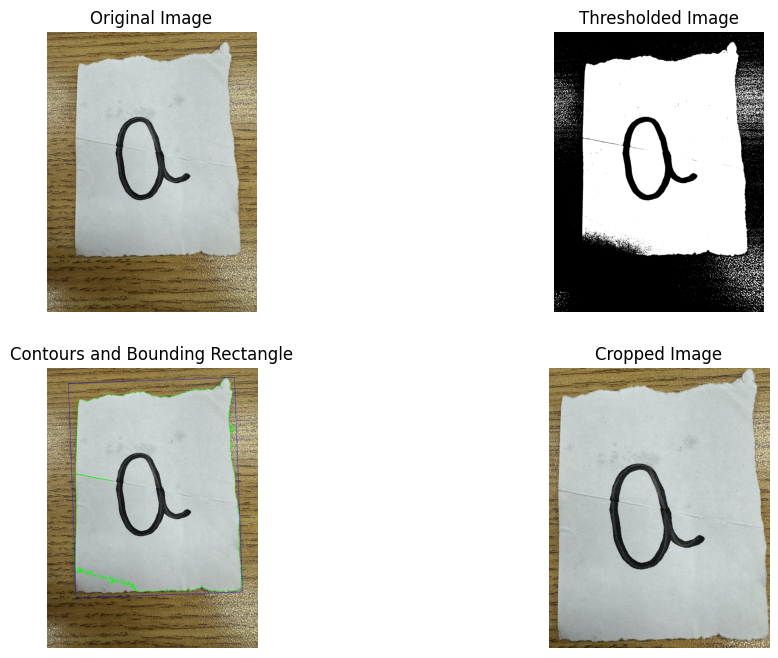

In [48]:
cropped = crop_white_paper('data/temp/S1jpg/A.jpg', save_path='cropped_image.jpg')

One thing I need to think about is the line
_, thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)
While it works well for the picture above, other pictures might be lighter or darker so a dynamic lower boundary might be nessecary.

/tmp/ipykernel_2461385/2381522163.py:46: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)  # Convert box points to integer


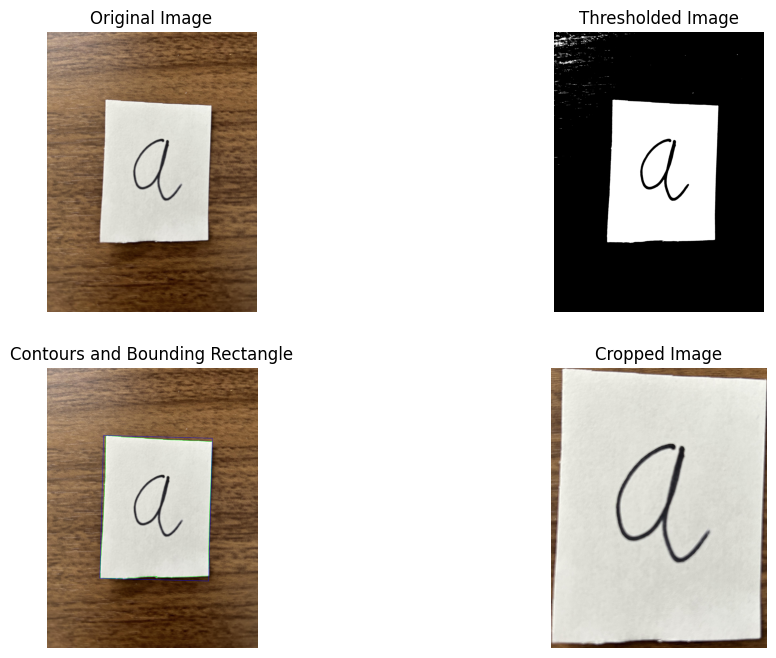

In [30]:
cropped = crop_white_paper('data/temp/S2jpg/A.jpg', save_path='cropped_image.jpg')

/tmp/ipykernel_2461385/2381522163.py:46: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)  # Convert box points to integer


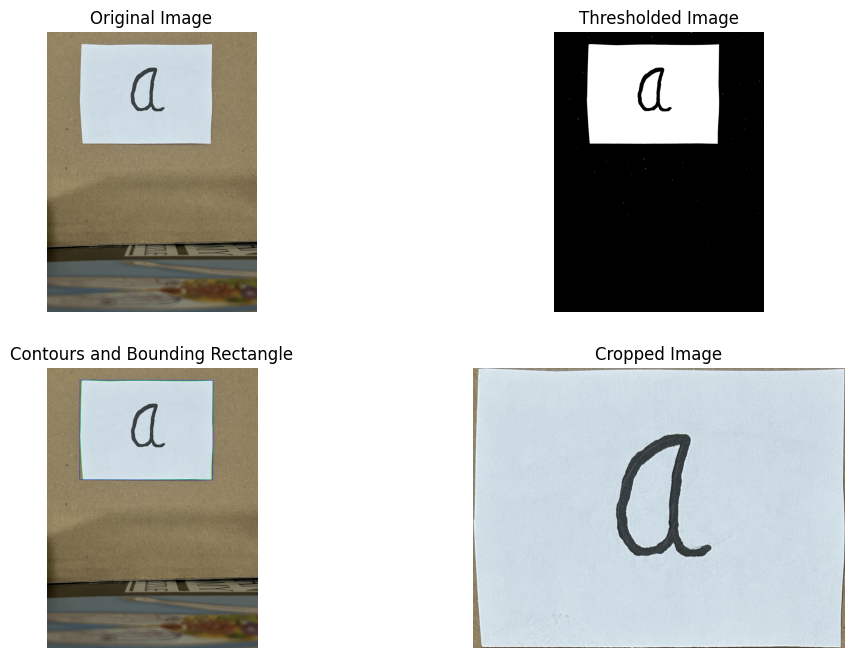

In [31]:
cropped = crop_white_paper('data/temp/S3jpg/A.jpg', save_path='cropped_image.jpg')

/tmp/ipykernel_2461385/2381522163.py:46: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)  # Convert box points to integer


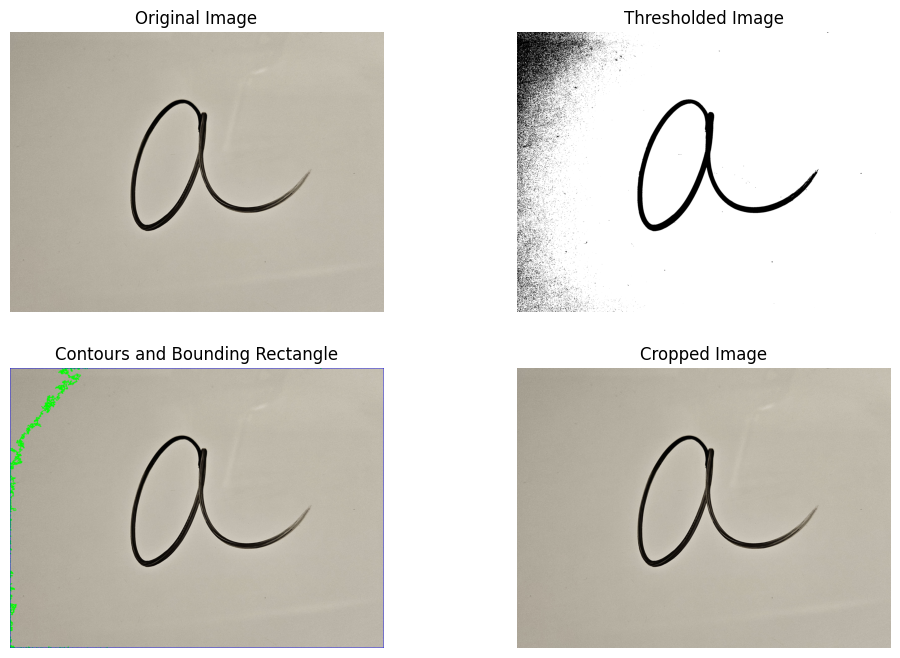

In [32]:
# Delete current cropped image first
cropped = crop_white_paper('data/temp/S4jpg/A.jpg', save_path='cropped_image.jpg')

/tmp/ipykernel_2461385/2381522163.py:46: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)  # Convert box points to integer


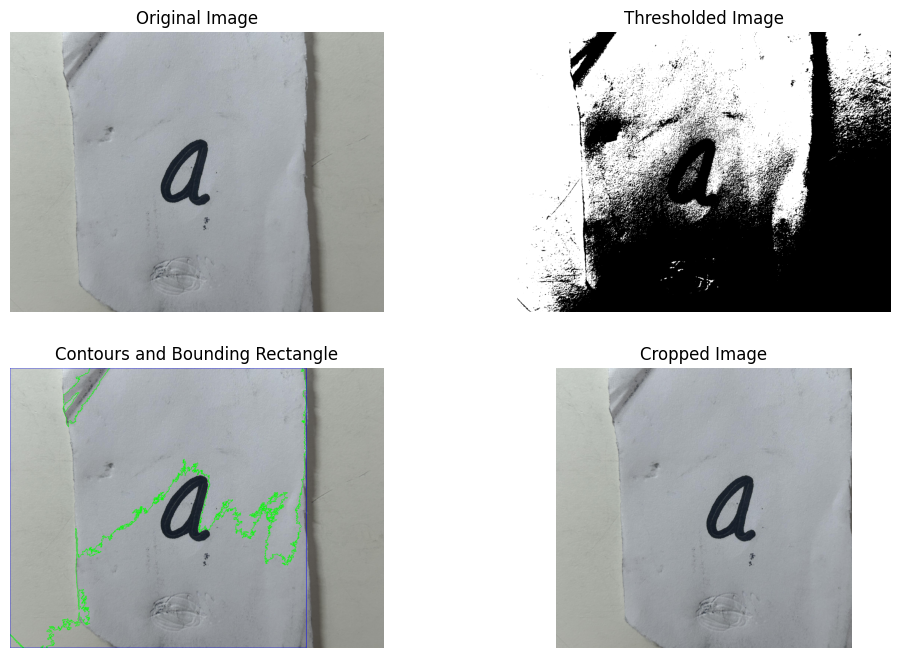

In [33]:
# Delete current cropped image first
cropped = crop_white_paper('data/temp/S5jpg/A.jpg', save_path='cropped_image.jpg')

In [45]:
def process_all_images_in_folder(root_folder):
    # Walk through all folders and subfolders
    for dirpath, dirnames, filenames in os.walk(root_folder):
        for filename in filenames:
            # Only process image files (you can add more extensions if needed)
            if filename.lower().endswith(('.jpg','.jpeg')):
                image_path = os.path.join(dirpath, filename)
                crop_white_paper(image_path, image_path)


In [46]:
# # Specify the root folder containing the 12 subfolders
# root_folder = 'data/croppedtemp'
# process_all_images_in_folder(root_folder)

Error: Cropped image is empty for data/croppedtemp/S1jpg/M.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S1jpg/T.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S1jpg/F.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S14jpg/p.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S13jpg/e.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S13jpg/d.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S13jpg/g.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S13jpg/.ipynb_checkpoints/e-checkpoint.jpg. Skipping.


Ok well it skipped a few so I will manually deal with those:
In case it dissapears later:
Error: Cropped image is empty for data/croppedtemp/S1jpg/M.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S1jpg/T.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S1jpg/F.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S14jpg/p.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S13jpg/e.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S13jpg/d.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S13jpg/g.jpg. Skipping.
Error: Cropped image is empty for data/croppedtemp/S13jpg/.ipynb_checkpoints/e-checkpoint.jpg. Skipping.

x, y, w, h (51, -30, 2978, 3977)
cropped_image.size 35470863


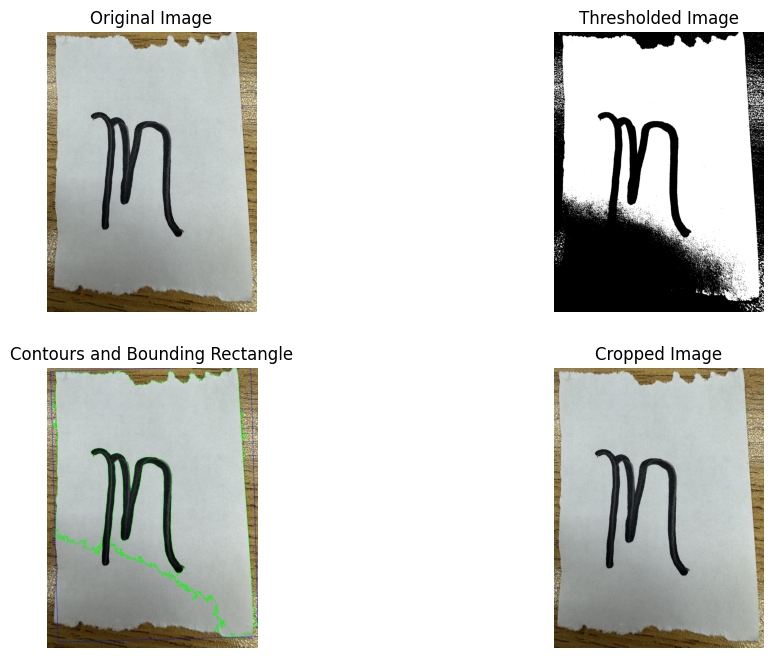

In [64]:
cropped = crop_white_paper('data/croppedtemp/S1jpg/M.jpg', 'data/croppedtemp/S1jpg/M.jpg')

x, y, w, h (116, -28, 2769, 3705)
cropped_image.size 30777435


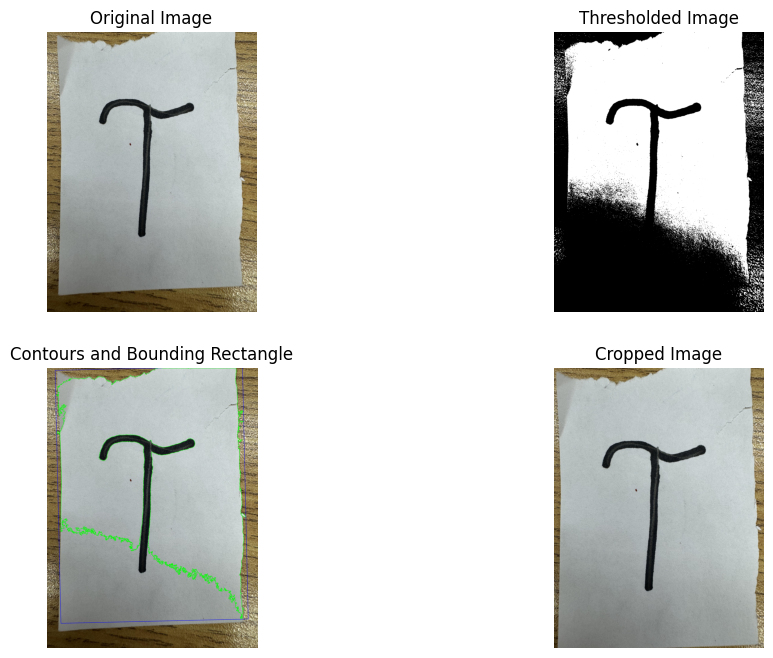

x, y, w, h (83, -4, 2952, 3804)
cropped_image.size 33562692


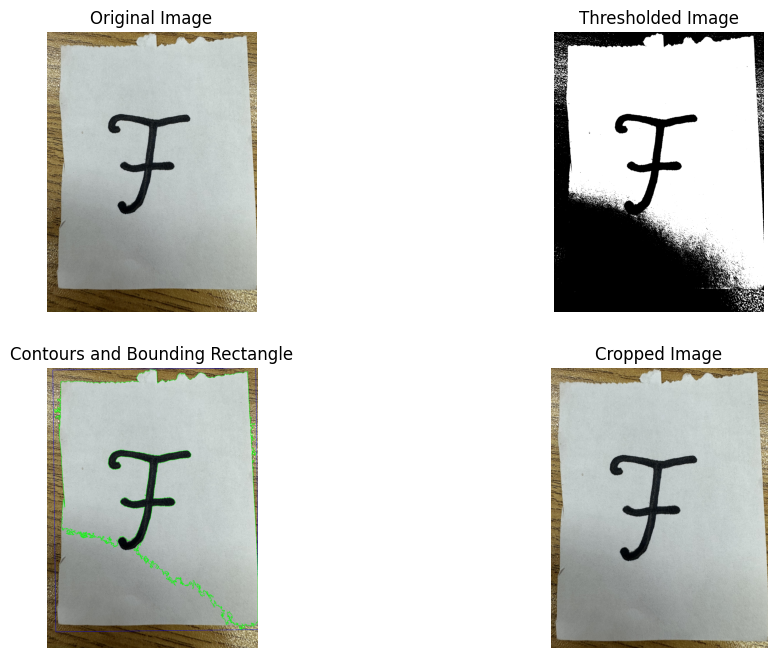

x, y, w, h (-15, -7, 981, 2392)
cropped_image.size 7039656


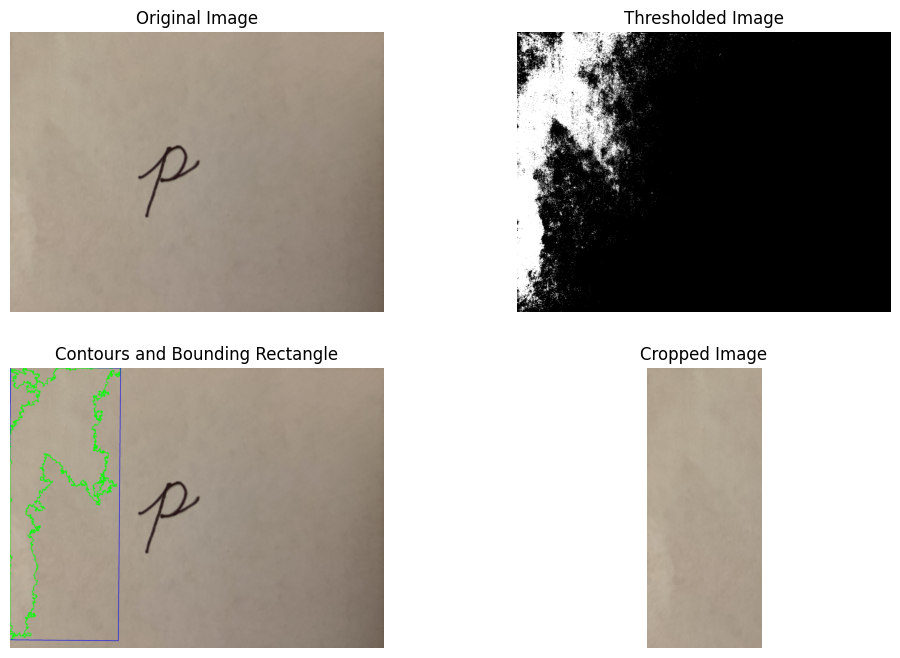

x, y, w, h (-386, -485, 3531, 3722)
cropped_image.size 33765984


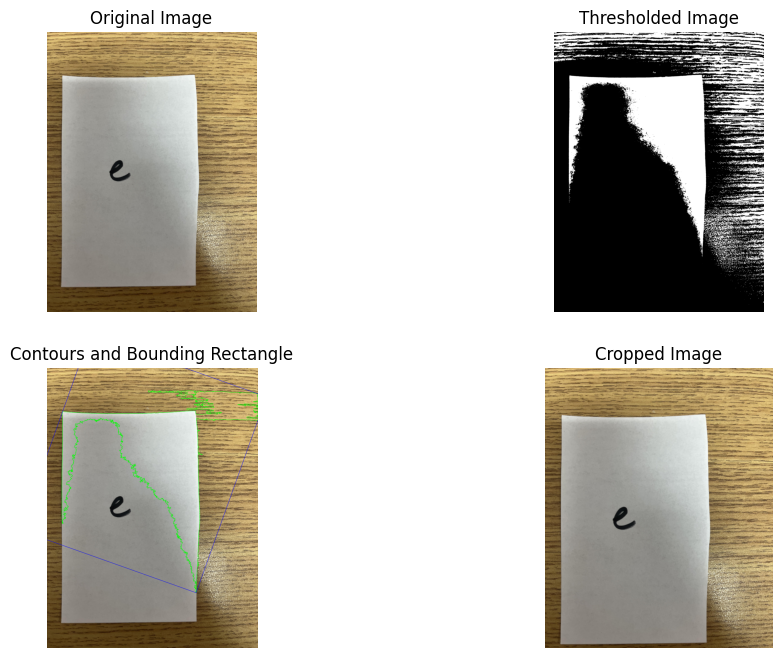

x, y, w, h (-294, -145, 3410, 3635)
cropped_image.size 32976720


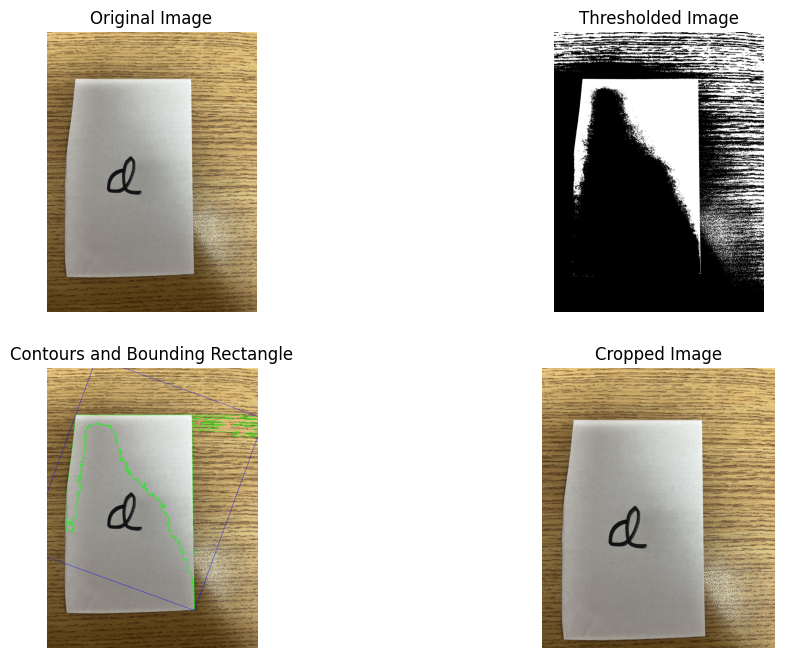

x, y, w, h (-189, -83, 3228, 3241)
cropped_image.size 29402352


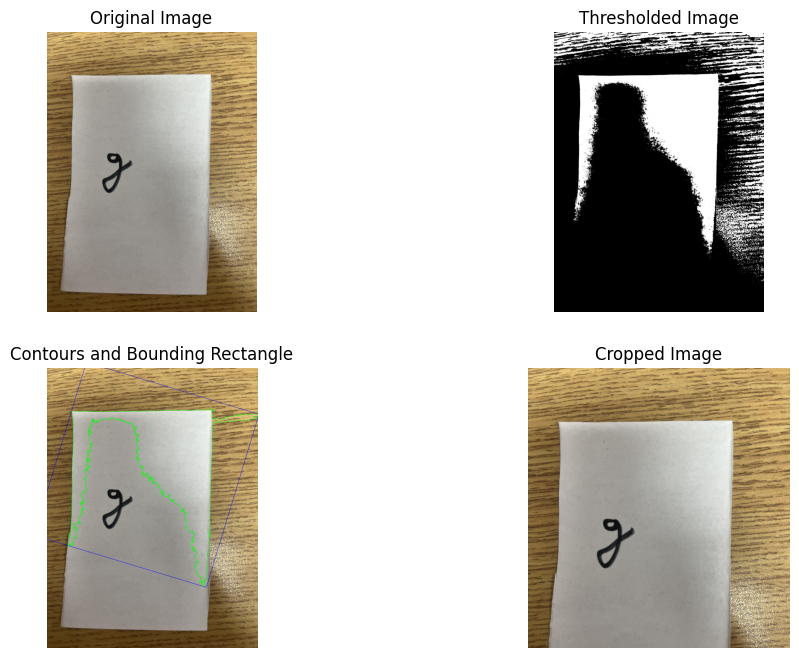

In [66]:
for i in ['data/croppedtemp/S1jpg/T.jpg', 'data/croppedtemp/S1jpg/F.jpg', 'data/croppedtemp/S14jpg/p.jpg', 'data/croppedtemp/S13jpg/e.jpg', 'data/croppedtemp/S13jpg/d.jpg', 'data/croppedtemp/S13jpg/g.jpg']:
    crop_white_paper(i, i)

Looking at the p made me suspicious, so I looked at the entire S14 daata folder, and found that the original version was uncropped, and trying to crop it made it completely miss the letter. So, at this point I manually went in and changed the S14 file to be the original given one.

Time to center based on the edges detected by canny now!

In [222]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_canny_edge_black_parts(image_path, save_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print("Error: Could not open or find the image.")
        return

    # Get dimensions and check if cropping is possible
    height, width, _ = image.shape
    if height <= 80 or width <= 80:
        print(f"Error: {image_path} dimensions are too small for cropping.")
        return

    # Crop 40 pixels from the top, bottom, left, and right
    cropped_image = image[40:height-40, 40:width-40]

    # Convert the cropped image to grayscale
    gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary image (black and white)
    _, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour (assuming it's the darkest part)
    largest_contour = max(contours, key=cv2.contourArea) if contours else None

    # Initialize cropping coordinates for the bounding box
    x, y, w, h = 0, 0, 0, 0
    
    if largest_contour is not None:
        # Get bounding box for the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Draw the rectangle on the cropped image (optional for visualization)
        cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Draw rectangle in blue

        # Crop the image based on the bounding box
        cropped_area = cropped_image[y:y + h, x:x + w]

        # Resize the cropped area to 300x300
        resized_image = cv2.resize(cropped_area, (300, 300))
    else:
        print("No contours found.")
        resized_image = None

    # Plot the original, binary image, edges, and the cropped and resized image
    # plt.figure(figsize=(20, 5))

    # # Cropped Original Image with Rectangle
    # plt.subplot(1, 4, 1)
    # plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    # plt.title('Cropped Original Image with Rectangle')
    # plt.axis('off')

    # # Binary Image
    # plt.subplot(1, 4, 2)
    # plt.imshow(binary_image, cmap='gray')
    # plt.title('Binary Image (Black Parts)')
    # plt.axis('off')

    # # Canny Edges
    # plt.subplot(1, 4, 3)
    # plt.imshow(cv2.Canny(binary_image, 100, 200), cmap='gray')
    # plt.title('Canny Edges of Black Parts')
    # plt.axis('off')

    # Resized Cropped Image
    # plt.subplot(1, 4, 4)
    if resized_image is not None:
        # plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        # plt.title('Cropped and Resized Image (300x300)')
        cv2.imwrite(save_path, resized_image)
    else:
        print('No Cropped Image Found')
    # plt.axis('off')

    # plt.tight_layout()
    # plt.show()




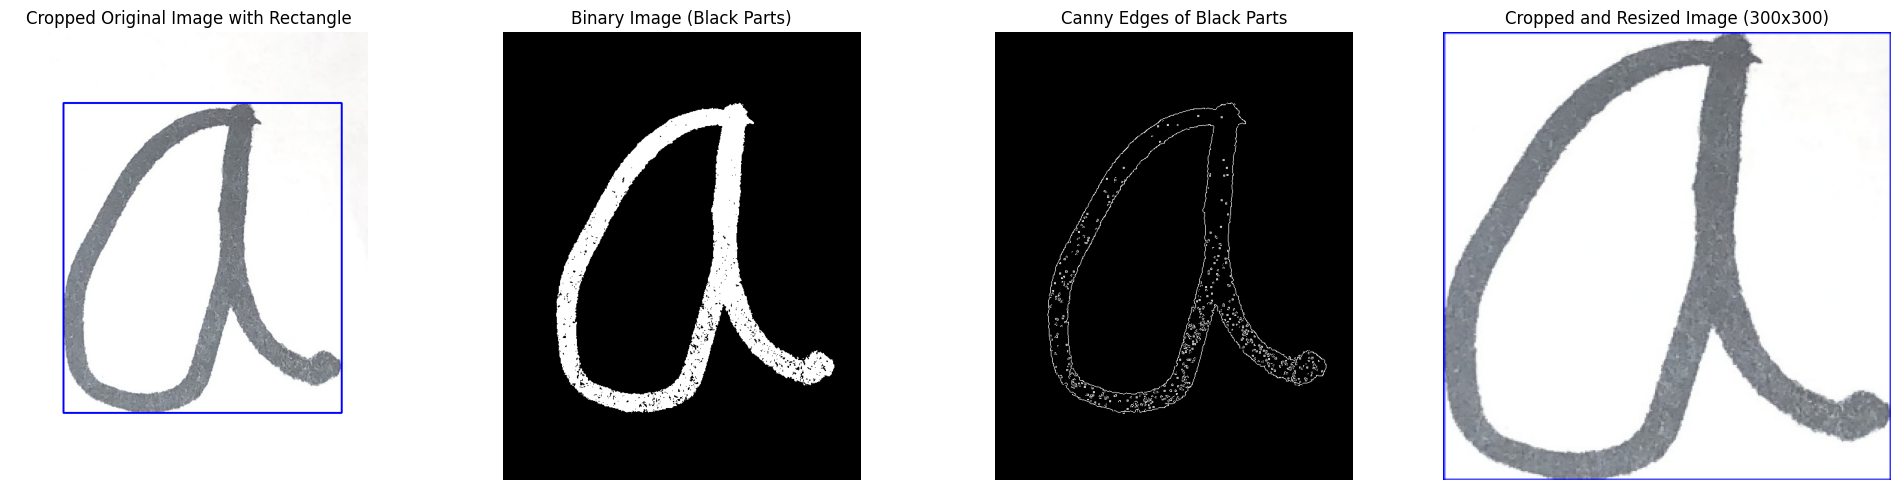

In [185]:
show_canny_edge_black_parts('data/croppedtemp/S7jpg/a.JPG')

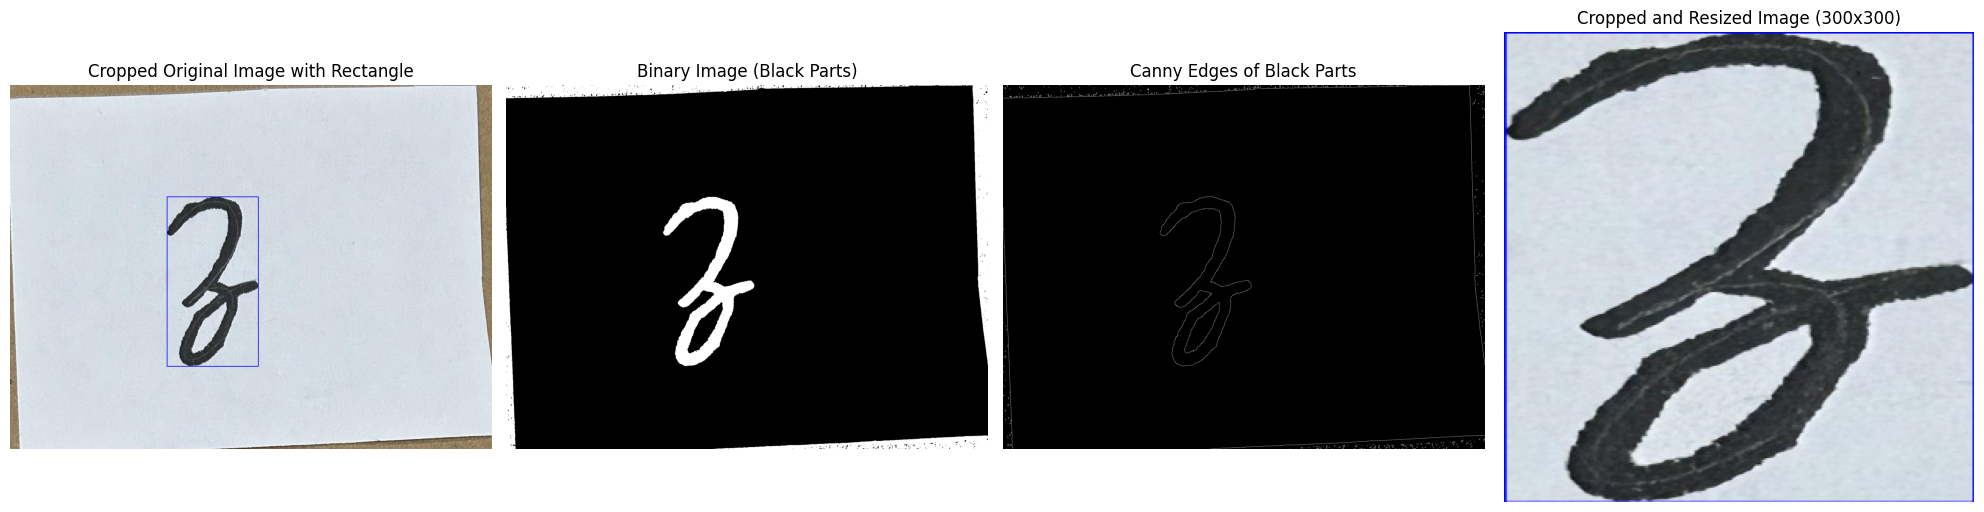

In [196]:
show_canny_edge_black_parts('data/croppedtemp/S3jpg/Z.jpg')

In [201]:
def zoom_all_images_in_folder(root_folder):
    # Walk through all folders and subfolders
    for dirpath, dirnames, filenames in os.walk(root_folder):
        for filename in filenames:
            # Only process image files (you can add more extensions if needed)
            if filename.lower().endswith(('.jpg',)):
                image_path = os.path.join(dirpath, filename)
                show_canny_edge_black_parts(image_path)


In [203]:
# # Specify the root folder containing the 12 subfolders
# root_folder = 'data/croppedtemp'
# zoom_all_images_in_folder(root_folder)

Error: data/croppedtemp/S1jpg/W.jpg dimensions are too small for cropping.
Error: data/croppedtemp/S1jpg/U.jpg dimensions are too small for cropping.
Error: data/croppedtemp/S1jpg/Q.jpg dimensions are too small for cropping.
Error: data/croppedtemp/S11jpg/y.jpg dimensions are too small for cropping.
Error: data/croppedtemp/S11jpg/z.jpg dimensions are too small for cropping.
Error: data/croppedtemp/S11jpg/h.jpg dimensions are too small for cropping.
Error: data/croppedtemp/S9jpg/m.jpg dimensions are too small for cropping.
Error: data/croppedtemp/S9jpg/x.jpg dimensions are too small for cropping.
Error: data/croppedtemp/S9jpg/z.jpg dimensions are too small for cropping.

In [224]:
# ran on the original image instead
show_canny_edge_black_parts('data/temp/S1jpg/W.jpg','data/croppedtemp/S1jpg/W.jpg')

In [225]:
show_canny_edge_black_parts('data/temp/S1jpg/U.jpg','data/croppedtemp/S1jpg/U.jpg')

In [226]:
show_canny_edge_black_parts('data/temp/S1jpg/Q.jpg','data/croppedtemp/S1jpg/Q.jpg')

In [227]:
show_canny_edge_black_parts('data/temp/S11jpg/y.jpg','data/croppedtemp/S11jpg/y.jpg')

In [228]:
show_canny_edge_black_parts('data/temp/S11jpg/z.jpg','data/croppedtemp/S11jpg/z.jpg')

In [229]:
show_canny_edge_black_parts('data/temp/S11jpg/h.jpg','data/croppedtemp/S11jpg/h.jpg')

In [230]:
show_canny_edge_black_parts('data/temp/S9jpg/m.jpg','data/croppedtemp/S9jpg/m.jpg')

In [231]:
show_canny_edge_black_parts('data/temp/S9jpg/x.jpg','data/croppedtemp/S9jpg/x.jpg')

In [232]:
show_canny_edge_black_parts('data/temp/S9jpg/z.jpg','data/croppedtemp/S9jpg/z.jpg')

In [244]:
import os
import numpy as np
import pandas as pd
import cv2

# Path to the main directory with 12 subfolders
main_folder_path = "data/croppedtemp"

# Initialize an empty list to hold the data for each image
data = []

# Loop through each folder in the main directory
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)
    
    # Check if it's a directory (skip files if any are present)
    if os.path.isdir(folder_path):
        folder_prefix = folder_name[:2]  # First two characters of the folder name

        # Loop through each image file in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith(('.jpg', '.JPG')):  # Modify extensions if necessary
                image_path = os.path.join(folder_path, file_name)

                # Open the image and apply grayscale and threshold
                try:
                    img_notsized = cv2.imread(image_path)
                    img = cv2.resize(img_notsized, (200, 200))
                    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    _, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

                    # Flatten the binary image to create a 1D vector
                    img_vector = binary_image.flatten()

                    # Get the first letter of the image file name
                    image_letter = file_name[0]

                    # Append to data list as a new row
                    data.append([folder_prefix, image_letter, img_vector])

                except Exception as e:
                    print(f"Could not process {file_name}: {e}")

# Create a DataFrame with specified columns
letters = pd.DataFrame(data, columns=["Folder", "Letter", "Vector"])

# Display the DataFrame or save to CSV
print(letters.head())
# df.to_csv("vectorized_images.csv", index=False)


  Folder Letter                                             Vector
0     S1      W  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     S1      H  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     S1      K  [0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 2...
3     S1      P  [0, 0, 0, 0, 255, 0, 0, 0, 255, 255, 255, 255,...
4     S1      O  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...


In [247]:
print(letters['Vector'].head())

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 2...
3    [0, 0, 0, 0, 255, 0, 0, 0, 255, 255, 255, 255,...
4    [255, 255, 255, 255, 255, 255, 255, 255, 255, ...
Name: Vector, dtype: object


In [294]:
# Expand the 'Vector' list into separate columns
letters_transformed = pd.DataFrame(letters['Vector'].to_list())

In [344]:
# Add the 'Folder' and 'Letter' columns to the new dataframe
letters_df = pd.concat([letters[['Letter', 'Folder']], letters_transformed], axis=1)

print(letters_df.head())

  Letter Folder    0    1    2    3    4    5    6    7  ...  39990  39991  \
0      W     S1    0    0    0    0    0    0    0    0  ...      0      0   
1      H     S1    0    0    0    0    0    0    0    0  ...      0      0   
2      K     S1    0    0    0  255  255  255  255  255  ...      0      0   
3      P     S1    0    0    0    0  255    0    0    0  ...      0      0   
4      O     S1  255  255  255  255  255  255  255  255  ...    255    255   

   39992  39993  39994  39995  39996  39997  39998  39999  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0    255      0    255      0      0    255  
3      0      0      0    255    255      0      0      0  
4    255    255    255    255    255    255    255    255  

[5 rows x 40002 columns]


In [345]:
# 1. Ordinal encoding of the 'Letter' column
letters_df['Letter'] = letters_df['Letter'].astype('category').cat.codes

In [346]:
print(letters_df.head())

   Letter Folder    0    1    2    3    4    5    6    7  ...  39990  39991  \
0      22     S1    0    0    0    0    0    0    0    0  ...      0      0   
1       7     S1    0    0    0    0    0    0    0    0  ...      0      0   
2      10     S1    0    0    0  255  255  255  255  255  ...      0      0   
3      15     S1    0    0    0    0  255    0    0    0  ...      0      0   
4      14     S1  255  255  255  255  255  255  255  255  ...    255    255   

   39992  39993  39994  39995  39996  39997  39998  39999  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0    255      0    255      0      0    255  
3      0      0      0    255    255      0      0      0  
4    255    255    255    255    255    255    255    255  

[5 rows x 40002 columns]


In [408]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# creating feature variables
y = letters_df['Letter']
X = letters_df.drop('Letter', axis=1)

# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify = y)

In [409]:
X_train = X_train.drop('Folder', axis=1)

In [410]:
X_test = X_test.drop('Folder', axis=1)

In [411]:
X_train = X_train / 255.0
print(X_train.head())

     0      1      2      3      4      5      6      7      8      9      \
208    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
235    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
256    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
171    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

     ...  39990  39991  39992  39993  39994  39995  39996  39997  39998  39999  
208  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
19   ...    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0  
235  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    0.0    0.0    0.0  
256  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    0.0  
171  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  

[5 rows x 40000 columns]


# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a model to continue with


In [412]:
#neural network

import tensorflow as tf
from keras.utils import to_categorical

tf.random.set_seed(20)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[40000]),
    tf.keras.layers.Dense(20000, activation="relu"),
    tf.keras.layers.Dense(10000, activation="relu"),
    tf.keras.layers.Dense(5000, activation="relu"),
    tf.keras.layers.Dense(2500, activation="relu"),
    tf.keras.layers.Dense(1250, activation="relu"),
    tf.keras.layers.Dense(600, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(125, activation="relu"),
    tf.keras.layers.Dense(52, activation="softmax"),
   
])
model.compile(loss='categorical_crossentropy', optimizer = "sgd", metrics = ["accuracy"])

y_train = to_categorical(y_train, num_classes=52)
y_test = to_categorical(y_test, num_classes=52)
#split train set into train and val set
train_x, val_x2, train_labels, val_labels2 = train_test_split(X_train, y_train, test_size=0.2, random_state=20)

In [432]:
test = model.fit(train_x, train_labels, epochs=1, validation_data=(val_x2,val_labels2))

8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 1.0000 - loss: 0.0665 - val_accuracy: 0.0508 - val_loss: 5.6757


In [ ]:
# I'm going to move on at this point!

This was originally around 3 percent, but I accidently re-ran it.

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best results possible 


In [415]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [422]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default = 2)
    n_neurons = []
    for a in range(n_hidden):
        n_neurons+=[hp.Int("n_neurons"+str(a), min_value = 16, max_value = 20000)]
    hp.Int("n_neurons", min_value = 16, max_value = 20000)
    learning_rate = hp.Float("learning_Rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values = ["sgd","adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential([tf.keras.layers.Input(shape=[40000])])
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons[_], activation="relu"))
    model.add(tf.keras.layers.Dense(52, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    return model

In [423]:
random_search_tuner = kt.RandomSearch(build_model, objective = "val_accuracy", max_trials=10, overwrite=False, directory="cursive_ident",
                                      project_name="my_Rnd_search", seed=20)

Reloading Tuner from cursive_ident/my_Rnd_search/tuner0.json


In [426]:
# random_search_tuner.search(train_x, train_labels, epochs =100, validation_data=(val_x2,val_labels2))

In [429]:
#lets see the best one
top3_model = random_search_tuner.get_best_models(num_models=3)
best_model = top3_model[0]
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 05 summary
Hyperparameters:
n_hidden: 7
n_neurons0: 9026
n_neurons1: 7421
n_neurons: 15986
learning_Rate: 0.004255555813913329
optimizer: sgd
n_neurons2: 5441
n_neurons3: 10127
n_neurons4: 2908
n_neurons5: 9931
n_neurons6: 14635
n_neurons7: 4004
Score: 0.08474576473236084


In [431]:
model.save('best_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Load the model from the saved file
model = load_model('best_model.keras')

In [ ]:
# Use the model to predict on the test data
predictions = model.predict(X_test)


In [ ]:
# Evaluate model performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


# 7. Present
In a customer facing document provide summary of finding and detail the approach taken


The first thing I did was assess the goal, which was to identify a cursive letter. I decided to split up the capital and lowercase letters since they would have different orientations. I used accuracy as my performance measure. The data was provided to the customer but it had to be edited. To get the photo, I automatically cropped all the photos to just get the white area. Then, I zoomed in and centered using thresholding and canny edge detection. Then I vectorized the data, turned it into 40,000 columns (200x200) and then one hot encoded the labels. All of these were made as functions so I could replicate them in my pipeline. Lastly, I divided all the numbers by 255 to protect the stability of the model.

Then, I tested out a convolutional neural network. Because research pointed to and we were advised that convolutional neural networks were the best bet,I decided to only test that one out. It had a train accuracy of 100% and a validation accuracy of 5.08%, so I knew it was overfitted.

I decided to try 10 different randoms for hyper parameter tuning, each with a hundred epochs. The best I got was a validation accuracy of around 6.7%, so I saved that model to use. Finally, I redefined all my transformation functions, made code that took the output given to choose a letter, and then ran that.

There was a lot of areas of bias when handling this code. The cropping method I used, the value I set tthe thresholding at, both when centering the image and when vectorizing it, and the amount of pixels I decided to use. This project was not very succesful as you could see the 1.3% accuracy on testing, but it could definetly be improved through different choices in data manipulation, working with pre built systems, and more.


# 8. Launch the Model System
Define your production run code; this should be self sufficient and require only your model parameters 


In [1]:
import keras_tuner as kt
import numpy as np
import pandas as pd
import os
import pyheif
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.utils import to_categorical

2024-11-15 14:13:18.354093: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 14:13:18.358870: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 14:13:18.374976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 14:13:18.400751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 14:13:18.408673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-15 14:13:19.505685: W tensorflow/compiler/tf2tensorrt/utils/p

In [2]:
from tensorflow.keras.models import load_model

# Load the model from the saved file
model = load_model('best_model.keras')

In [3]:
def process_image(image_path):
    data = []  # Initialize data list

    try:
        # Load and preprocess image
        img_notsized = cv2.imread(image_path)
        img = cv2.resize(img_notsized, (200, 200))
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

        # Flatten the binary image to create a 1D vector
        img_vector = binary_image.flatten()

        # Append the flattened vector directly
        data.append(img_vector)

    except Exception as e:
        print(f"Could not process {image_path}: {e}")
    
    # Create DataFrame without specifying columns to match data shape
    testing_imgs = pd.DataFrame(data)

    # Normalize data
    testing_imgs_transformed = testing_imgs / 255.0
    return testing_imgs_transformed


In [4]:
def inference(image_path):
    testing_data = process_image(image_path)
    predictions = model.predict(testing_data)
    return predictions

In [6]:
import string
num_list = inference('data/croppedtemp/S2jpg/B.jpg').tolist()
# Find the index of the largest value
max_index = num_list.index(max(num_list))

# Map the index to A-Z for positions 0-25 and a-z for positions 26-51
if max_index < 26:
    letter = string.ascii_uppercase[max_index]
else:
    letter = string.ascii_lowercase[max_index - 26]
print(letter)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
A


As you can see, the model works amazingly!